# Diseño de Generador de Ecuaciones de Búsqueda

## Objetivo

Conformar ecuaciones de búsqueda compatibles con:
- Scopus
- Scielo
- Búsqueda de patentes
- Google y otros buscadores genéricos.

## Metodología general

Realizar al inicio, revisar si se requiere:

1. Definir alcance, usar formato de Definición Alcance.
2. Con lo anterior llenar hoja FCV
3. Definir tabla de keywords (Columnas AND y filas OR, es decir sinónimos español e inglés)

Realizar n veces, de acuerdo a los resultados que se vayan obteniendo.

4. Conformar una ecuación con base en la tabla (OBJETIVO DE ESTE CUADERNO)
    1. Parametrizar de acuerdo al buscador (SCOPUS y genérico)
    2. Generar la ecuación
5. Usar la ecuación e incorporar el resultado en un cuaderno a modo de bitácora (¿mejor que usar excel?)

## Algoritmo para generación de ecuaciones

1. Inicializar
    1. Importar pandas
    2. otros?
2. Importar hoja desde archivo excel con keywords
3. Preguntar por parámetro
    1. SCOPUS
    2. OTROS
4. Caso SCOPUS:
    1. TITLE-ABS-KEY(
    2. k1
    3. OR - volver a 2 hasta n-1
    4. )
    5. AND - volver a 1 hasta n-1
    6. )
TODO: apenas funcione para scopus se saca la genérica.

## Funciones de Pandas

Puede ser útil: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

### importar excel

```python
pandas.read_excel(io, sheet_name=0,
                  header=0,
                  names=None,
                  index_col=None,
                  usecols=None,
                  squeeze=False,
                  dtype=None,
                  engine=None,
                  converters=None,
                  true_values=None,
                  false_values=None,
                  skiprows=None,
                  nrows=None,
                  na_values=None,
                  keep_default_na=True,
                  na_filter=True,
                  verbose=False,
                  parse_dates=False,
                  date_parser=None,
                  thousands=None,
                  comment=None,
                  skipfooter=0,
                  convert_float=None,
                  mangle_dupe_cols=True,
                  storage_options=None)
```


In [22]:
%reset -sf
import pandas as pd

### Definir parámetros

- **buscador** (string): "scopus" u otros
- **elementosClave** (int): número de columnas a considerar de la tabla de palabras clave
- **maxPalabras** (lista int): máximo de filas a tomar de cada columna
- **pubYearAfter** (int): buscar después de este año

In [23]:
buscador = "scopus"

elementosClave = 2

maxPalabras = [7,5,6,0,0]

pubYearAfter = 2001

### Importar archivo excel

adicionalmente, se limpia para que sólo queden las columnas con contenido

In [24]:
keywordsDf = pd.read_excel(open("PlaneacionBusqueda_MedicionMadurez.xlsx", 'rb'),
                          sheet_name='Palabras Clave',
                          index_col=None,
                          skiprows=8,
                          usecols=range(1,elementosClave+1),
                          keep_default_na=True,
                         )
keywordsDf.dropna(how='all', axis=1, inplace=True)
keywordsDf.dropna(how='all', axis=0, inplace=True)
keywordsDf

,Elemento estructural 1,Elemento estructural 2
0,"""fruit ripeness""",sensor
1,"""oil palm ripeness""",measurement
2,"""fruit maturity""","""inductive sensor"""
3,"""age of ripeness""","""air coil"""
4,"""fruitfulness""","""resonant frequency"""
5,"""oil palm""","""frequency selection"""
6,"""maturity classification""","""electrical circuit"""
7,"""madurez de fruto""","""Sensor inductivo"""
8,"""identify ripeness""","""Frecuencia de resonancia"""
9,"""forecasting harvest time of oil palm""","""Image analysis"""


### Segmentación en columnas y conformación de la ecuación

Se convierten a una lista de columnas, luego se conforman las ecuaciones de acuerdo a los parámetros

In [25]:
if buscador == "scopus":
    ecuacion = "TITLE-ABS-KEY("
else:
    ecuacion = "("
    
for i,nomColumna in enumerate(keywordsDf.columns):
    print(f"*{nomColumna}*","\n")
    columna = keywordsDf[str(nomColumna)].dropna().tolist()
    for j,palabra in enumerate(columna):
        ecuacion = ecuacion + palabra + " OR "
        print(palabra)
        if j>=maxPalabras[i]-1:
            print("\n")
            break
    ecuacion = ecuacion[:-4]
    ecuacion += ") "
    ecuacion += " AND "
    if buscador == "scopus":
        ecuacion += "TITLE-ABS-KEY("
    else:
        ecuacion += "("
if buscador == "scopus":
    ecuacion = ecuacion[:-20]
else:
    ecuacion = ecuacion[:-7]
    
if pubYearAfter != 0:
    ecuacion += " AND PUBYEAR > " + str(pubYearAfter)

*Elemento estructural 1* 

"fruit ripeness"
"oil palm ripeness"
"fruit maturity"
"age of ripeness"
"fruitfulness"
"oil palm"
"maturity classification"


*Elemento estructural 2* 

sensor
measurement
"inductive sensor"
"air coil"
"resonant frequency"




Ahora puedo usar la ecuación:

In [26]:
print(ecuacion)

TITLE-ABS-KEY("fruit ripeness" OR "oil palm ripeness" OR "fruit maturity" OR "age of ripeness" OR "fruitfulness" OR "oil palm" OR "maturity classification")  AND TITLE-ABS-KEY(sensor OR measurement OR "inductive sensor" OR "air coil" OR "resonant frequency") AND PUBYEAR > 2001


### Ajustes manuales a la ecuación

En la misma herramienta de búsqueda, se pueden hacer ajustes con los filtros que incorpora Scopus, o incluso removiendo elementos y observando el resultado.

A continuación un registro de las ecuaciones resultantes

Original: 

TITLE-ABS-KEY("fruit ripeness" OR "oil palm ripeness" OR "fruit maturity" OR "age of ripeness" OR "fruitfulness" OR "oil palm" OR "maturity classification")  AND TITLE-ABS-KEY(sensor OR measurement OR "inductive sensor" OR "air coil" OR "resonant frequency")  AND TITLE-ABS-KEY("Hardware development" OR Design OR Implementation OR Construction OR Hardware OR Development) AND PUBYEAR > 2001

Modificada:

TITLE-ABS-KEY ( "fruit ripeness"  OR  "oil palm ripeness"  OR  "fruit maturity"  OR  "age of ripeness"  OR  "fruitfulness"  OR  "oil palm"  OR  "maturity classification" )  AND  TITLE-ABS-KEY ( sensor  OR  measurement  OR  "inductive sensor"  OR  "air coil"  OR  "resonant frequency" )  AND  TITLE-ABS-KEY ( "Hardware development"  OR  design  OR  implementation  OR  construction  OR  hardware  OR  development )  AND  PUBYEAR  >  2001  AND  ( LIMIT-TO ( SUBJAREA ,  "AGRI" )  OR  LIMIT-TO ( SUBJAREA ,  "ENGI" )  OR  LIMIT-TO ( SUBJAREA ,  "COMP" )  OR  LIMIT-TO ( SUBJAREA ,  "ENVI" )  OR  LIMIT-TO ( SUBJAREA ,  "PHYS" )  OR  LIMIT-TO ( SUBJAREA ,  "MATE" ) )  AND  ( EXCLUDE ( SUBJAREA ,  "EART" ) ) 

## Tips

### Scopus

Usar ecuación de búsqueda en "Advanced Search" para poder ingresar la ecuación completa

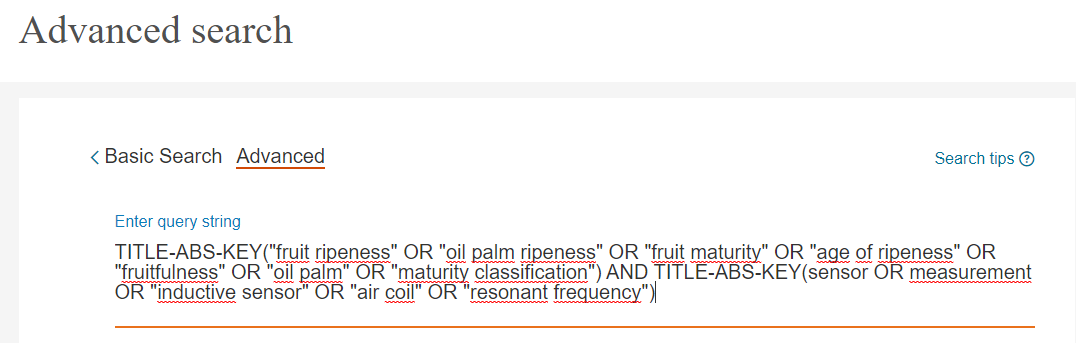

Si necesitara iterar sobre las filas, puedo usar:
```python
for i, row in keywordsDf.iterrows():
    print(i,"\n",row,"\n")
    pass
```


## Búsqueda con API Elsevier

basado en esta página: https://towardsdatascience.com/title-using-python-for-everyday-tasks-an-example-of-retrieving-metadata-from-scopus-database-4339610a86f2

vamos a tratar de generar resultados similares a los de esta ecuación

TITLE-ABS-KEY("fruit ripeness" OR "oil palm ripeness" OR "fruit maturity" OR "age of ripeness" OR "fruitfulness" OR "oil palm" OR "maturity classification")  AND TITLE-ABS-KEY(sensor OR measurement OR "inductive sensor" OR "air coil" OR "resonant frequency") AND PUBYEAR > 2001

In [141]:
import requests

base_url = 'http://api.elsevier.com/content/search/scopus?'
# search in title, abstract, and key
scope    = 'TITLE-ABS-KEY'
# formulating the query structure
terms1   = '({fruit ripeness} OR {oil palm ripeness} OR {fruit maturity} OR {age of ripeness} OR {fruitfulness} OR {oil palm} OR {maturity classification})'
terms2   = '({sensor} OR {measurement} OR {air coil} OR {inductive sensor} OR {resonant frequency})'
terms    = '({} AND {})'.format(terms1, terms2)
# insert your personal key (it is free and available on https://dev.elsevier.com/)
apiKey   = '&apiKey=a50f452fc4714da048f4c40e78ef7e54' 
date     = '&date=2001-2022'
# it is the maximum number of results per query for a free account
count    = '&count=25' 
sort     = '&sort=citedby-count'
view     = '&view=standard'

this function sends a request and returns the total articles, the #starting position of the first article, and the metadata of each #article.

In [146]:
def search_scopus(url):
    
    res = requests.get(url)
    if res.status_code ==200:
        content  = json.loads(res.content)['search-results']
        total    = content['opensearch:totalResults']
        start    = content['opensearch:startIndex']
        metadata = content['entry']
        return int(total), int(start), metadata

    else:
        error = json.loads(res.content)['service-error']['status']          
        print(res.status_code, error['statusText'])

## Ejemplo de búsqueda por temas

In [143]:
terms

'(({fruit ripeness} OR {oil palm ripeness} OR {fruit maturity} OR {age of ripeness} OR {fruitfulness} OR {oil palm} OR {maturity classification}) AND ({sensor} OR {measurement} OR {air coil} OR {inductive sensor} OR {resonant frequency}))'

In [193]:
# list of all subjects in Scopus database
scopusDf = pd.DataFrame({})
subjects = ['ENGI', 'PHYS', 'AGRI', 'COMP', 'EART', 'ENVI', 'MATH', 'MULT']
for sub in subjects:
    # starting index of the results for display
    # starting index refers to number position of not pages
    start_index  = 0
    while True:   

        start    = '&start={}'.format(start_index) 
        subj     = '&subj={}'.format(sub)
        query    = 'query=' + scope + terms + date + start + count + sort + subj + apiKey + view
        url  = base_url + query
        # total results per subject, starting index of first result in 
        #each query and data
        total, start_index, metadata = search_scopus(url)
        # save metadata in dataframe
        for i,dat in enumerate(list(metadata)):
            metadata[i]["Subject"] = sub
        scopusDf= scopusDf.append(pd.DataFrame.from_dict(metadata))
        # check how many results need to be retrieved
        remain = total - start_index - len(metadata)
        print(start_index, " --- ",remain, " de ",total)
        if remain>0:
            start_index+=25 # to search next 25 results
        else:
            break # breaking from while loop
    print(total," resultados en ",sub)

0  ---  153  de  178
25  ---  128  de  178
50  ---  103  de  178
75  ---  78  de  178
100  ---  53  de  178
125  ---  28  de  178
150  ---  3  de  178
175  ---  0  de  178
178  resultados en  ENGI
0  ---  57  de  82
25  ---  32  de  82
50  ---  7  de  82
75  ---  0  de  82
82  resultados en  PHYS
0  ---  181  de  206
25  ---  156  de  206
50  ---  131  de  206
75  ---  106  de  206
100  ---  81  de  206
125  ---  56  de  206
150  ---  31  de  206
175  ---  6  de  206
200  ---  0  de  206
206  resultados en  AGRI
0  ---  69  de  94
25  ---  44  de  94
50  ---  19  de  94
75  ---  0  de  94
94  resultados en  COMP
0  ---  43  de  68
25  ---  18  de  68
50  ---  0  de  68
68  resultados en  EART
0  ---  88  de  113
25  ---  63  de  113
50  ---  38  de  113
75  ---  13  de  113
100  ---  0  de  113
113  resultados en  ENVI
0  ---  0  de  22
22  resultados en  MATH
0  ---  0  de  11
11  resultados en  MULT


In [190]:
scopusDf

,@_fa,link,prism:url,dc:identifier,eid,dc:title,dc:creator,prism:publicationName,prism:issn,prism:volume,...,openaccess,openaccessFlag,freetoread,freetoreadLabel,Subject,pii,prism:eIssn,article-number,pubmed-id,prism:isbn
0,true,"[{'@_fa': 'true', '@ref': 'self', '@href': 'https://api.elsevier.com/content/abstract/scopus_id/13244267204'}, {'@_fa': 'true', '@ref': 'author-affiliation', '@href': 'https://api.elsevier.com/content/abstract/scopus_id/13244267204?field=author,affiliation'}, {'@_fa': 'true', '@ref': 'scopus', '@href': 'https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=13244267204&origin=inward'}, {'@_fa': 'true', '@ref': 'scopus-citedby', '@href': 'https://www.scopus.com/inward/citedby.uri?partnerID=HzOxMe3b&scp=13244267204&origin=inward'}]",https://api.elsevier.com/content/abstract/scopus_id/13244267204,SCOPUS_ID:13244267204,2-s2.0-13244267204,Evaluation of an electronic nose to assess fruit ripeness,Brezmes J.,IEEE Sensors Journal,1530437X,5,...,0,False,"{'value': [{'$': 'all'}, {'$': 'repository'}, {'$': 'repositoryvor'}]}","{'value': [{'$': 'All Open Access'}, {'$': 'Green'}]}",ENGI,NaN,NaN,NaN,NaN,NaN
1,true,"[{'@_fa': 'true', '@ref': 'self', '@href': 'https://api.elsevier.com/content/abstract/scopus_id/84945207487'}, {'@_fa': 'true', '@ref': 'author-affiliation', '@href': 'https://api.elsevier.com/content/abstract/scopus_id/84945207487?field=author,affiliation'}, {'@_fa': 'true', '@ref': 'scopus', '@href': 'https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=84945207487&origin=inward'}, {'@_fa': 'true', '@ref': 'scopus-citedby', '@href': 'https://www.scopus.com/inward/citedby.uri?partnerID=HzOxMe3b&scp=84945207487&origin=inward'}, {'@_fa': 'true', '@ref': 'full-text', '@href': 'https://api.elsevier.com/content/article/eid/1-s2.0-S0263224115005382'}]",https://api.elsevier.com/content/abstract/scopus_id/84945207487,SCOPUS_ID:84945207487,2-s2.0-84945207487,The capability of ultrafiltrated alkaline and organosolv oil palm (Elaeis guineensis) fronds lignin as green corrosion inhibitor for mild steel in 0.5 M HCl solution,Hussin M.H.,Measurement: Journal of the International Measurement Confederation,02632241,78,...,0,False,NaN,NaN,ENGI,S0263224115005382,NaN,NaN,NaN,NaN
2,true,"[{'@_fa': 'true', '@ref': 'self', '@href': 'https://api.elsevier.com/content/abstract/scopus_id/81755166528'}, {'@_fa': 'true', '@ref': 'author-affiliation', '@href': 'https://api.elsevier.com/content/abstract/scopus_id/81755166528?field=author,affiliation'}, {'@_fa': 'true', '@ref': 'scopus', '@href': 'https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=81755166528&origin=inward'}, {'@_fa': 'true', '@ref': 'scopus-citedby', '@href': 'https://www.scopus.com/inward/citedby.uri?partnerID=HzOxMe3b&scp=81755166528&origin=inward'}]",https://api.elsevier.com/content/abstract/scopus_id/81755166528,SCOPUS_ID:81755166528,2-s2.0-81755166528,A new unmanned aerial vehicle synthetic aperture radar for environmental monitoring,Koo V.C.,Progress in Electromagnetics Research,10704698,122,...,1,True,"{'value': [{'$': 'all'}, {'$': 'publisherfree2read'}]}","{'value': [{'$': 'All Open Access'}, {'$': 'Bronze'}]}",ENGI,NaN,15598985,NaN,NaN,NaN
3,true,"[{'@_fa': 'true', '@ref': 'self', '@href': 'https://api.elsevier.com/content/abstract/scopus_id/27944461498'}, {'@_fa': 'true', '@ref': 'author-affiliation', '@href': 'https://api.elsevier.com/content/abstract/scopus_id/27944461498?field=author,affiliation'}, {'@_fa': 'true', '@ref': 'scopus', '@href': 'https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=27944461498&origin=inward'}, {'@_fa': 'true', '@ref': 'scopus-citedby', '@href': 'https://www.scopus.com/inward/citedby.uri?partnerID=HzOxMe3b&scp=27944461498&origin=inward'}]",https://api.elsevier.com/content/abstract/scopus_id/27944461498,SCOPUS_ID:27944461498,2-s2.0-27944461498,Unwired wine: Sensor networks in vineyards,Beckwith R.,Proceedings of IEEE Sensors,NaN,2,...,0,False,NaN,NaN,ENGI,NaN,NaN,T2L-A.1,NaN,NaN


In [191]:
for i,col in enumerate(scopusDf.columns):
    print(i,col)

0 @_fa
1 link
2 prism:url
3 dc:identifier
4 eid
5 dc:title
6 dc:creator
7 prism:publicationName
8 prism:issn
9 prism:volume
10 prism:issueIdentifier
11 prism:pageRange
12 prism:coverDate
13 prism:coverDisplayDate
14 prism:doi
15 citedby-count
16 affiliation
17 prism:aggregationType
18 subtype
19 subtypeDescription
20 source-id
21 openaccess
22 openaccessFlag
23 freetoread
24 freetoreadLabel
25 Subject
26 pii
27 prism:eIssn
28 article-number
29 pubmed-id
30 prism:isbn


In [192]:
scopusMain = scopusDf.iloc[:,[3,5,6,12,25]]
pd.set_option('display.max_colwidth', None)
scopusMain = scopusMain.sort_values("prism:coverDate",ascending = False)
scopusMain = scopusMain.reset_index()
scopusMain

,index,dc:identifier,dc:title,dc:creator,prism:coverDate,Subject
0,7,SCOPUS_ID:85112515136,Near-Infrared Spectroscopy for Ganoderma Boninense Detection: An Outlook,Tan M.I.S.M.H.,2022-01-01,ENGI
1,6,SCOPUS_ID:85114513887,Papaya maturity classification in MATLAB platform using lab method and DHT11 sensor,Brucal S.G.E.,2021-07-29,ENGI
2,22,SCOPUS_ID:85105350650,Thermal performance of structural lightweight concrete composites for potential energy saving,Lee Y.H.,2021-05-01,PHYS
3,10,SCOPUS_ID:85104721564,Ganoderma boninense disease detection by near‐infrared spectroscopy classification: A review,Mohd Hilmi Tan M.I.S.,2021-05-01,ENGI
4,9,SCOPUS_ID:85106312326,Self-sustaining bioelectrochemical cell from fungal degradation of lignin-rich agrowaste,Sukri A.,2021-04-02,ENGI
...,...,...,...,...,...,...
223,0,SCOPUS_ID:13244267204,Evaluation of an electronic nose to assess fruit ripeness,Brezmes J.,2005-02-01,PHYS
224,10,SCOPUS_ID:34147163185,Transmitter and receiver design of an experimental airborne synthetic aperture radar sensor,Chan Y.,2004-12-01,PHYS
225,3,SCOPUS_ID:27944461498,Unwired wine: Sensor networks in vineyards,Beckwith R.,2004-12-01,ENGI
226,16,SCOPUS_ID:34147163185,Transmitter and receiver design of an experimental airborne synthetic aperture radar sensor,Chan Y.,2004-12-01,ENGI


## Exportar resultados

In [ ]:
scopusMain.to_excel("resultado_API_scopus.xlsx")

## Alternativa: pybibliometrics

Este módulo al parecer puede hacer todo lo que se hizo directamente con la API: https://pybliometrics.readthedocs.io/en/stable/classes/ScopusSearch.html#pybliometrics.scopus.ScopusSearch